<a href="https://colab.research.google.com/github/madhugid/madhugid/blob/main/Chennai_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Importing Libraries and Uploading Data

In [2]:
import pandas as pd
import numpy as np
from google.colab import files
from matplotlib import pyplot
import seaborn as sns
from pandas.plotting import scatter_matrix

In [3]:
#uploaded = files.upload()

In [4]:
#creating data frame chpp
chpp = pd.read_csv("/content/drive/MyDrive/Data Science Project/train-chennai-sale.csv")
chpp.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


# A Look through DATA

Summary of Data

In [5]:
chpp.shape

(7109, 22)

There are around 22 columns (features) and 7109 rows (values)

In [6]:
chpp.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


We can see that there is a huge difference in the range of values present in our numerical features indicating a need for standardization or normalization so as to make sure features are on almost the same scale so that each feature is equally important and make it easier to process by most ML algorithms.

In [7]:
chpp.head().T

,0,1,2,3,4
PRT_ID,P03210,P09411,P01812,P05346,P06210
AREA,Karapakkam,Anna Nagar,Adyar,Velachery,Karapakkam
INT_SQFT,1004,1986,909,1855,1226
DATE_SALE,04-05-2011,19-12-2006,04-02-2012,13-03-2010,05-10-2009
DIST_MAINROAD,131,26,70,14,84
N_BEDROOM,1.0,2.0,1.0,3.0,1.0
N_BATHROOM,1.0,1.0,1.0,2.0,1.0
N_ROOM,3,5,3,5,3
SALE_COND,AbNormal,AbNormal,AbNormal,Family,AbNormal
PARK_FACIL,Yes,No,Yes,No,Yes


In [8]:
chpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

Understanding Different features:
PRT_ID, AREA, SALE_COND, PARK_FACIL, BUILDTYPE, UTILITY_AVAIL, STREET, MZZONE are categorical variables.
INT_SQFT, DIST_MAINROAD, N_BEDROOM, N_BATHROOM, N_ROOM,QS_ROOMS, QS_BATHROOM, QS_BEDROOM, QS_OVERALL, REG_FEE, COMMIS, SALES_PRICE are numerical variables
DATE_SALE, DATE_BUILD are date variables.

Having a look at data we can understand that PRT_ID seems to be an unique id parameter and a primary key with out much significance or impact on our Target Variable viz SALES_PRICE
Considering the REG_FEE and COMMIS to be registration fee and Commission which is generally decided based upon the SALE_PRICE, these two features doesnt have significant impact on the target variable.


In [9]:
chpp.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

There are nulll values in features N_BEDROOM, N_BATHROOM, QS_OVERALL features. We need to deal with the null values first to make the data ready for model building.
It is also observed that the data type of some of the features is 'object' and needs to be converted into Numkeric format to make it machine readable.
DATE_SALE and DATE_BUILD are in object type and needs to be converted to Date format

# DATA CLEANING

DATA CLEANING & PRE PROCESSING:
In next few steps we will clean and pre process the data to make it ready for Exploratory Data Analysis and Model building

Dealing with null values: QS_overall has around 48 values. N_BEDROOM, N_BATHROOM are having 1 and 5 null values respectively which needs to bedealt with before going a head

In [10]:
#unique values of QS_VALUE
chpp["QS_OVERALL"].unique()

array([4.33 , 3.765, 3.09 , 4.01 , 3.29 , 3.32 , 2.67 , 3.26 , 3.55 ,
       3.16 , 3.83 , 2.89 , 2.26 , 3.19 , 3.66 ,   nan, 3.57 , 4.3  ,
       3.35 , 4.76 , 3.39 , 3.43 , 3.73 , 3.59 , 3.74 , 2.29 , 3.17 ,
       4.18 , 2.755, 2.11 , 2.605, 4.58 , 4.2  , 3.27 , 4.19 , 2.98 ,
       3.12 , 3.08 , 3.85 , 3.42 , 3.2  , 4.   , 3.34 , 2.825, 3.46 ,
       4.07 , 3.68 , 2.95 , 3.505, 2.97 , 3.63 , 3.76 , 3.77 , 2.78 ,
       3.985, 3.04 , 2.88 , 4.21 , 2.42 , 3.8  , 2.54 , 3.84 , 2.395,
       3.14 , 2.49 , 3.175, 2.84 , 4.17 , 3.13 , 3.98 , 3.36 , 3.735,
       2.62 , 4.61 , 2.6  , 4.09 , 3.18 , 3.425, 3.71 , 3.21 , 3.61 ,
       2.9  , 3.94 , 4.145, 4.26 , 4.16 , 3.5  , 3.22 , 3.99 , 4.12 ,
       2.475, 2.28 , 2.725, 4.03 , 3.07 , 2.81 , 3.45 , 3.9  , 3.87 ,
       3.1  , 2.93 , 3.05 , 3.54 , 2.63 , 3.11 , 3.89 , 3.33 , 3.96 ,
       3.56 , 4.39 , 3.58 , 3.47 , 3.88 , 4.04 , 3.6  , 4.53 , 3.72 ,
       2.96 , 3.4  , 3.51 , 4.215, 3.055, 3.06 , 3.53 , 3.435, 3.41 ,
       3.86 , 3.62 ,

In [11]:
#Finding unique values and value counts of feature N_BEDROOM
print("unique values are", chpp["N_BEDROOM"].unique())
print(chpp["N_BEDROOM"].value_counts())

unique values are [ 1.  2.  3.  4. nan]
1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64


In [12]:
#Finding unique values and value counts of feature N_BEDROOM
print("Unique values are", chpp["N_BATHROOM"].unique())
print(chpp["N_BATHROOM"].value_counts())

Unique values are [ 1.  2. nan]
1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64


Based on the above data, df_overall feature is a continuous variable ranging between 2 to 4.97. Here we will be using mean value to replace null values.
N_BEDROOM, N_BATHROOM has 1,2,3,4 and 1,2 as values successively and hence taking mean value is not right decision as we can't have floating value as no of bedrooms. hence we will use mode value to replace null values which migh rightly represent the data


In [13]:
#replacing null values using mean
qs_overallmean = chpp["QS_OVERALL"].mean()
print(round(qs_overallmean,2))
chpp["QS_OVERALL"].fillna(value = qs_overallmean, inplace = True)

3.5


In [14]:
#replacing null values using mode
n_bedroom_mode = chpp["N_BEDROOM"].mode()[0]
print(n_bedroom_mode)
chpp["N_BEDROOM"].fillna(value = n_bedroom_mode, inplace = True)

1.0


In [15]:
#replacing null values using mode
n_bathroom_mode = chpp["N_BATHROOM"].mode()[0]
print(n_bathroom_mode)
chpp["N_BATHROOM"].fillna(value = n_bathroom_mode, inplace = True)

1.0


In [16]:
#verifying whether the null values were replaced or not
chpp.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

All the null values are replaced and the data looks quite clean.

Feature analysis: we will look into all individual features and check for anycleaning activities to perform and also understand the feature

In [17]:
chpp["PRT_ID"].value_counts()

P03210    1
P01175    1
P07437    1
P06628    1
P02767    1
         ..
P01279    1
P00654    1
P03895    1
P02662    1
P09794    1
Name: PRT_ID, Length: 7109, dtype: int64

In [18]:
chpp["REG_FEE"].value_counts()

235229    3
304066    2
291085    2
457606    2
351194    2
         ..
602559    1
493507    1
132013    1
218460    1
349177    1
Name: REG_FEE, Length: 7038, dtype: int64

In [19]:
chpp["COMMIS"].value_counts()

117825    3
50804     2
155124    2
148017    2
120600    2
         ..
84023     1
212522    1
84390     1
145799    1
79812     1
Name: COMMIS, Length: 7011, dtype: int64

*   By looking at the feature PRT_ID we can understand that each and every value of the feature is unique indicating it to be an id column with out much significance in influencing the target variable. Hence it is better to drop the column.
*   It can be understood that, in general REG_Fee (Registration Fee), COMMIS(Commission) doesn't decide the sale price but will be derived from the sales price, It will be better to drop the features.





In [20]:
chpp["AREA"].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

By looking at the above data it is clearly understandable that while the actual number of features is actually 6, due to different spellings used the number of unique values for the feature increased to 17. In the next step we will be correcting the spelling so that the feature values indicating the correct values.

In [21]:
#Cleaning of feature AREA by replacing incorrect spellings with correct values
chpp["AREA"] = chpp["AREA"].replace(["Chrompt","Chrmpet","Chormpet"], "Chrompet")
chpp["AREA"] = chpp["AREA"].replace(["Ann Nagar","Ana Nagar"], "Anna Nagar")
chpp["AREA"] = chpp["AREA"].replace(["Velchery","Adyr","KKNagar", "TNagar","Karapakam"],["Velachery","Adyar","KK Nagar","T Nagar","Karapakkam"])
chpp["AREA"].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [22]:
#Cleaning of feature SALE_COND by replacing incorrect spellings with correct values
print("unique value's of SALE_COND", chpp["SALE_COND"].unique())
chpp["SALE_COND"] = chpp["SALE_COND"].replace(["Ab Normal","Partiall","Adj Land", "PartiaLl"],["AbNormal","Partial","AdjLand","Partial"])
chpp["SALE_COND"].value_counts()

unique value's of SALE_COND ['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']


AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

It can be observed from the data that the no of buildings are more or less evenly distributed among different values of feature

In [23]:
#Cleaning of feature PARK_FACILITY
print("Unique values for feature Parking facility", chpp["PARK_FACIL"].unique())
chpp["PARK_FACIL"] = chpp["PARK_FACIL"].replace(["Noo"], "No")
chpp["PARK_FACIL"].value_counts()

Unique values for feature Parking facility ['Yes' 'No' 'Noo']


Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [24]:
#Cleaning the feature BUILDTYPE
print("unique values for feature BUILDTYPE", chpp["BUILDTYPE"].unique())
chpp["BUILDTYPE"] = chpp["BUILDTYPE"].replace(["Comercial","Other"],["Commercial","Others"])
chpp["BUILDTYPE"].value_counts()

unique values for feature BUILDTYPE ['Commercial' 'Others' 'Other' 'House' 'Comercial']


House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [25]:
#Cleaning the feature UTILITY_AVAIL
print("Unique values for the feature are", chpp['UTILITY_AVAIL'].unique())
chpp["UTILITY_AVAIL"] = chpp["UTILITY_AVAIL"].replace(["All Pub","NoSeWa"],["AllPub","NoSewr "])
chpp["UTILITY_AVAIL"].value_counts()

Unique values for the feature are ['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']


NoSewr     3700
AllPub     1887
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [26]:
#Cleaning the feature STREET
print("Unique values for the feature", chpp["STREET"].unique())
chpp["STREET"] = chpp["STREET"].replace(["Pavd","NoAccess"],["Paved","No Access"])
chpp["STREET"].value_counts()

Unique values for the feature ['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']


Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [27]:
chpp["MZZONE"].unique()
chpp["MZZONE"].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

There is no Cleaning required for the feature "MZZONE". How ever we can observe that the number of buildings in RL, RH, RM is nearly thrice the number of buildings in Zones A,C,I

In [28]:
chpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7109 non-null   float64
 6   N_BATHROOM     7109 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

# DATA PRE_PROCESSING

We now proceed to process the data to transform into usable format and improve the quality of data.

In [29]:
chpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7109 non-null   float64
 6   N_BATHROOM     7109 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

*   We can see that Date features like DATE_SALE and DATE_BUILD are in object type. This needs to be converted into date format first before performing any actions on the feature. 
*   In general we know that the price of a building depends upon its life rather than when it is build and when it is sold. Hence calculating building life will make the data more usefull rather than using build date and date sold.

In Next step we will be calculating building life and dropping DATE_SALE and DATE_BUILD features from the data frame.



In [30]:
#Converting DATE_SALE and DATE_BUILD into date format and calculating age of house in years
chpp["DATE_SALE"] = pd.to_datetime(chpp["DATE_SALE"])
chpp["DATE_BUILD"] = pd.to_datetime(chpp["DATE_BUILD"])
chpp["building_life"] = (chpp["DATE_SALE"].dt.year - chpp["DATE_BUILD"].dt.year)
chpp["building_life"]. head()

0    44
1    11
2    20
3    22
4    30
Name: building_life, dtype: int64

Now we proceed to drop following features:
*   DATE_SALE & DATE_BUILD as we already calculated building life using these 2 features and these 2 columns doesnt have much significance henceforth.

*   REG_FEE & COMMIS as we know that registration fees and commission are calculated based on sales price and doesnt haave much significance in determining the target variable SALES_PRICE
*   PRT_ID as we already observed it to be a id column and doesnt influence the target variable.




In [31]:
# Dropping unnecessary features viz DATE_BUILD, DATE_SALE, PRT_ID, REG_FEE, COMMIS
chpp.drop(["DATE_SALE","DATE_BUILD", "PRT_ID","REG_FEE","COMMIS"], inplace = True, axis = 1)
chpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DIST_MAINROAD  7109 non-null   int64  
 3   N_BEDROOM      7109 non-null   float64
 4   N_BATHROOM     7109 non-null   float64
 5   N_ROOM         7109 non-null   int64  
 6   SALE_COND      7109 non-null   object 
 7   PARK_FACIL     7109 non-null   object 
 8   BUILDTYPE      7109 non-null   object 
 9   UTILITY_AVAIL  7109 non-null   object 
 10  STREET         7109 non-null   object 
 11  MZZONE         7109 non-null   object 
 12  QS_ROOMS       7109 non-null   float64
 13  QS_BATHROOM    7109 non-null   float64
 14  QS_BEDROOM     7109 non-null   float64
 15  QS_OVERALL     7109 non-null   float64
 16  SALES_PRICE    7109 non-null   int64  
 17  building_life  7109 non-null   int64  
dtypes: float

In general we observe that house of a building is advertised or sold based on price per square feet rather than total price in most of the cases. Hence we will calculate price persquarefeet using SALES_PRICE and INT_SQFT and store it in PRICE_SQFT

In [32]:
#creating new feature PRICE_SQFT
chpp["PRICE_SQFT"] = (chpp["SALES_PRICE"]/chpp["INT_SQFT"]).astype(int)
chpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DIST_MAINROAD  7109 non-null   int64  
 3   N_BEDROOM      7109 non-null   float64
 4   N_BATHROOM     7109 non-null   float64
 5   N_ROOM         7109 non-null   int64  
 6   SALE_COND      7109 non-null   object 
 7   PARK_FACIL     7109 non-null   object 
 8   BUILDTYPE      7109 non-null   object 
 9   UTILITY_AVAIL  7109 non-null   object 
 10  STREET         7109 non-null   object 
 11  MZZONE         7109 non-null   object 
 12  QS_ROOMS       7109 non-null   float64
 13  QS_BATHROOM    7109 non-null   float64
 14  QS_BEDROOM     7109 non-null   float64
 15  QS_OVERALL     7109 non-null   float64
 16  SALES_PRICE    7109 non-null   int64  
 17  building_life  7109 non-null   int64  
 18  PRICE_SQ

# Exploratory Data Analysis

In [33]:
chpp.corr()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,building_life,PRICE_SQFT
INT_SQFT,1.000000,0.002022,0.786263,0.515290,0.951279,0.019850,-0.008337,0.008865,0.013989,0.612125,-0.012610,-0.444849
DIST_MAINROAD,0.002022,1.000000,-0.002723,0.001850,0.002301,0.002237,-0.029468,0.001554,-0.017255,0.018783,-0.003559,0.015666
N_BEDROOM,0.786263,-0.002723,1.000000,0.755207,0.840209,0.014948,-0.007534,0.015752,0.014245,0.330987,-0.045873,-0.441431
N_BATHROOM,0.515290,0.001850,0.755207,1.000000,0.568541,0.013376,-0.012043,0.013191,0.007961,0.108834,-0.020403,-0.385651
N_ROOM,0.951279,0.002301,0.840209,0.568541,1.000000,0.016524,-0.007545,0.015072,0.015418,0.602760,-0.033316,-0.394647
QS_ROOMS,0.019850,0.002237,0.014948,0.013376,0.016524,1.000000,0.008828,0.007789,0.516147,0.021967,0.019718,0.004031
QS_BATHROOM,-0.008337,-0.029468,-0.007534,-0.012043,-0.007545,0.008828,1.000000,-0.011745,0.549056,-0.011377,0.021700,-0.003858
QS_BEDROOM,0.008865,0.001554,0.015752,0.013191,0.015072,0.007789,-0.011745,1.000000,0.628168,0.018804,-0.017971,0.011988
QS_OVERALL,0.013989,-0.017255,0.014245,0.007961,0.015418,0.516147,0.549056,0.628168,1.000000,0.020485,0.012517,0.008473
SALES_PRICE,0.612125,0.018783,0.330987,0.108834,0.602760,0.021967,-0.011377,0.018804,0.020485,1.000000,-0.118842,0.388150


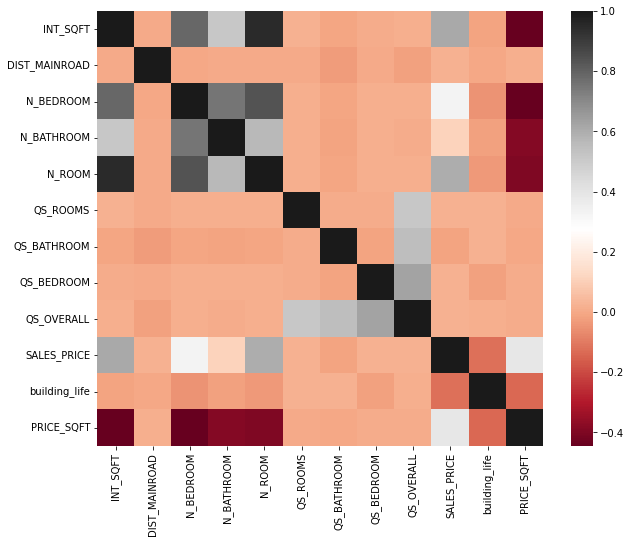

In [34]:
pyplot.subplots(figsize=(10,8))
sns.heatmap(chpp.corr(), cmap = 'RdGy')

Highest correlation is observed between N_ROOM and INT_SQFT. As it is quite possible that with increase in number of rooms area of the house also increases.

Also good positive correlation is observed between N_ROOM, N_BATHROOM, N_BEDROOM and INT_SQFT

We also observe Significant positive correlation between Target Variable SALE_PRICE and features like INT_SQFT, N_ROOM, N_BEDROOM indicating importance linear relationship.

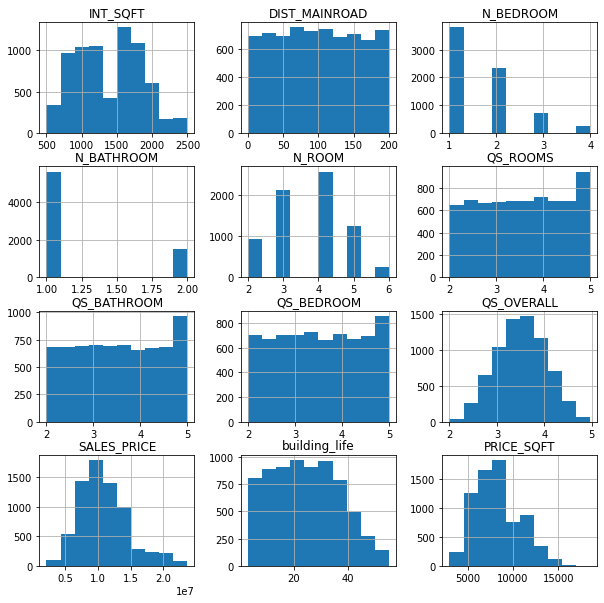

In [35]:
from matplotlib import pyplot
chpp.hist(figsize=(10,10))
pyplot.show()

A normal distribution is observed for QS_OVERALL feature. While SALES_PRICE, Building_life feature's showed a right skewed distribution, we cant observe normal distribution in rest of the features. In most of the features like DIST_MAINROAD, QS_ROOMS, QS_BATHROOM, QS_BEDROOM the curve is kind of flat indicating similar cound among the range.
Though N_BEDROOM, N_BATHROOM, N_ROOM are distributed among few values we can observe a right skewed distribution

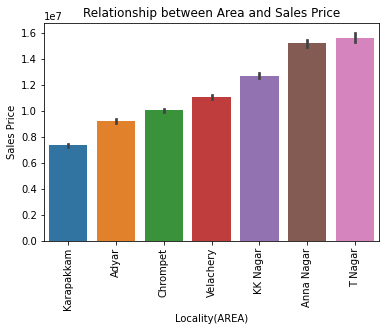

In [36]:
sns.barplot(x = "AREA", y = "SALES_PRICE", data = chpp, order = chpp.groupby("AREA")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["AREA"])
pyplot.ylabel("Sales Price")
pyplot.xlabel("Locality(AREA)")
pyplot.xticks(rotation = 90)
pyplot.title("Relationship between Area and Sales Price")
pyplot.show()

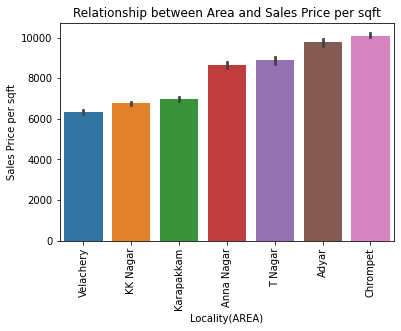

In [37]:
sns.barplot(x = "AREA", y = "PRICE_SQFT", data = chpp, order = chpp.groupby("AREA")["PRICE_SQFT"].mean().reset_index().sort_values("PRICE_SQFT")["AREA"])
pyplot.ylabel("Sales Price per sqft")
pyplot.xlabel("Locality(AREA)")
pyplot.xticks(rotation = 90)
pyplot.title("Relationship between Area and Sales Price per sqft")
pyplot.show()

We can see that there is a linear relationship betweenn AREA and Sales 
Price with high price in TNagar while the prices of houses are low in Karapakkam
While the sales price is highest in T Nagar, price per sqft is higher in Chrompet indicating the premium paid to the locality is highest for buildings constructed in Chrompet.
Based on the above plots we can also observed that the buildings constructed in T Nagar has higher sqft area leading to increase in sales price of building while price per sqft is high in Chrompet


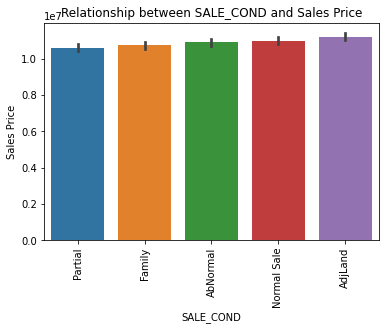

In [38]:
sns.barplot(x = "SALE_COND", y = "SALES_PRICE", data = chpp, order = chpp.groupby("SALE_COND")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["SALE_COND"])
pyplot.ylabel("Sales Price")
pyplot.xlabel("SALE_COND")
pyplot.xticks(rotation = 90)
pyplot.title("Relationship between SALE_COND and Sales Price")
pyplot.show()

There is a linear relationship between the feature SALE_COND and Target. Hence we can go with label encoding


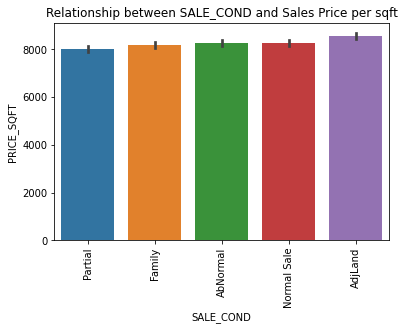

In [39]:
sns.barplot(x = "SALE_COND", y = "PRICE_SQFT", data = chpp, order = chpp.groupby("SALE_COND")["PRICE_SQFT"].mean().reset_index().sort_values("PRICE_SQFT")["SALE_COND"])
pyplot.ylabel("PRICE_SQFT")
pyplot.xlabel("SALE_COND")
pyplot.xticks(rotation = 90)
pyplot.title("Relationship between SALE_COND and Sales Price per sqft")
pyplot.show()

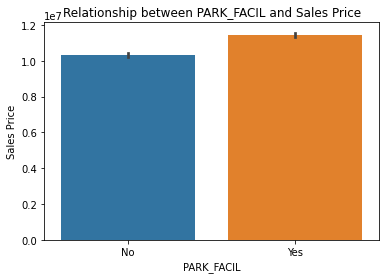

In [40]:
sns.barplot(x = "PARK_FACIL", y = "SALES_PRICE", data = chpp, order = chpp.groupby("PARK_FACIL")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["PARK_FACIL"])
pyplot.ylabel("Sales Price")
pyplot.xlabel("PARK_FACIL")
pyplot.xticks()
pyplot.title("Relationship between PARK_FACIL and Sales Price")
pyplot.show()

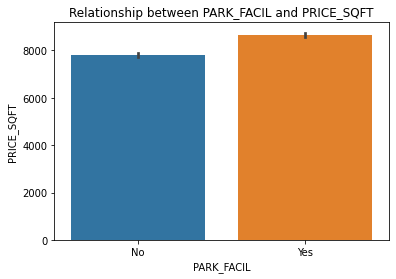

In [41]:
sns.barplot(x = "PARK_FACIL", y = "PRICE_SQFT", data = chpp, order = chpp.groupby("PARK_FACIL")["PRICE_SQFT"].mean().reset_index().sort_values("PRICE_SQFT")["PARK_FACIL"])
pyplot.ylabel("PRICE_SQFT")
pyplot.xlabel("PARK_FACIL")
pyplot.xticks()
pyplot.title("Relationship between PARK_FACIL and PRICE_SQFT")
pyplot.show()

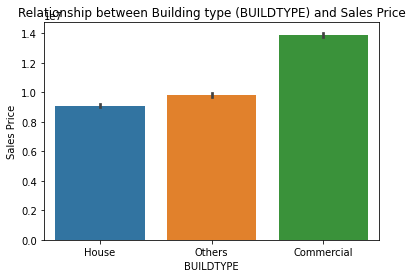

In [42]:
sns.barplot(x = "BUILDTYPE", y = "SALES_PRICE", data = chpp, order = chpp.groupby("BUILDTYPE")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["BUILDTYPE"])
pyplot.ylabel("Sales Price")
pyplot.xlabel("BUILDTYPE")
pyplot.xticks()
pyplot.title("Relationship between Building type (BUILDTYPE) and Sales Price")
pyplot.show()

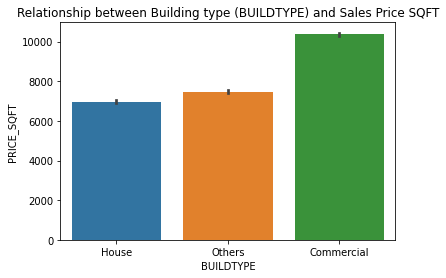

In [43]:
sns.barplot(x = "BUILDTYPE", y = "PRICE_SQFT", data = chpp, order = chpp.groupby("BUILDTYPE")["PRICE_SQFT"].mean().reset_index().sort_values("PRICE_SQFT")["BUILDTYPE"])
pyplot.ylabel("PRICE_SQFT")
pyplot.xlabel("BUILDTYPE")
pyplot.xticks()
pyplot.title("Relationship between Building type (BUILDTYPE) and Sales Price SQFT")
pyplot.show()

We can observed that while the cost of residential building is least, cost of commercial building is the highest

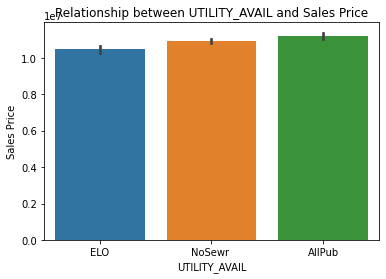

In [44]:
sns.barplot(x = "UTILITY_AVAIL", y = "SALES_PRICE", data = chpp, order = chpp.groupby("UTILITY_AVAIL")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["UTILITY_AVAIL"])
pyplot.ylabel("Sales Price")
pyplot.xlabel("UTILITY_AVAIL")
pyplot.xticks()
pyplot.title("Relationship between UTILITY_AVAIL and Sales Price")
pyplot.show()

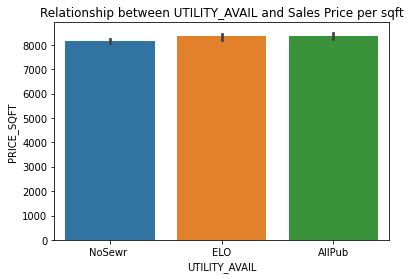

In [45]:
sns.barplot(x = "UTILITY_AVAIL", y = "PRICE_SQFT", data = chpp, order = chpp.groupby("UTILITY_AVAIL")["PRICE_SQFT"].mean().reset_index().sort_values("PRICE_SQFT")["UTILITY_AVAIL"])
pyplot.ylabel("PRICE_SQFT")
pyplot.xlabel("UTILITY_AVAIL")
pyplot.xticks()
pyplot.title("Relationship between UTILITY_AVAIL and Sales Price per sqft")
pyplot.show()

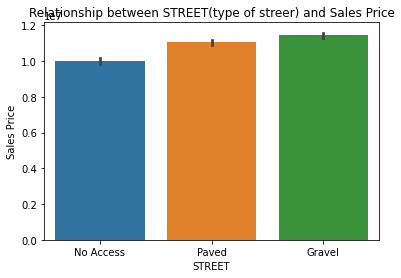

In [46]:
sns.barplot(x = "STREET", y = "SALES_PRICE", data = chpp, order = chpp.groupby("STREET")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["STREET"])
pyplot.ylabel("Sales Price")
pyplot.xlabel("STREET")
pyplot.xticks()
pyplot.title("Relationship between STREET(type of streer) and Sales Price")
pyplot.show()

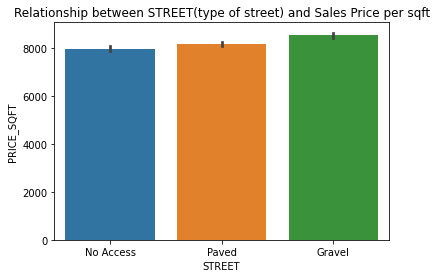

In [47]:
sns.barplot(x = "STREET", y = "PRICE_SQFT", data = chpp, order = chpp.groupby("STREET")["PRICE_SQFT"].mean().reset_index().sort_values("PRICE_SQFT")["STREET"])
pyplot.ylabel("PRICE_SQFT")
pyplot.xlabel("STREET")
pyplot.xticks()
pyplot.title("Relationship between STREET(type of street) and Sales Price per sqft")
pyplot.show()

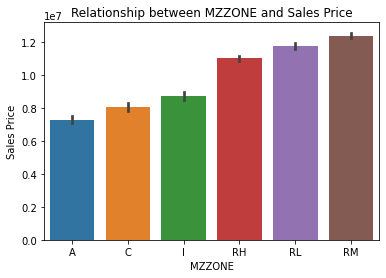

In [48]:
sns.barplot(x = "MZZONE", y = "SALES_PRICE", data = chpp, order = chpp.groupby("MZZONE")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["MZZONE"])
pyplot.ylabel("Sales Price")
pyplot.xlabel("MZZONE")
pyplot.xticks()
pyplot.title("Relationship between MZZONE and Sales Price")
pyplot.show()

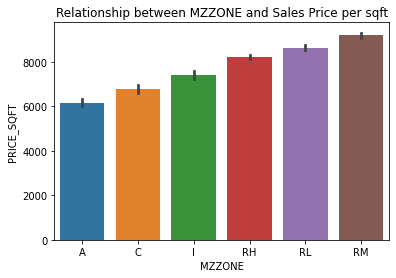

In [49]:
sns.barplot(x = "MZZONE", y = "PRICE_SQFT", data = chpp, order = chpp.groupby("MZZONE")["PRICE_SQFT"].mean().reset_index().sort_values("PRICE_SQFT")["MZZONE"])
pyplot.ylabel("PRICE_SQFT")
pyplot.xlabel("MZZONE")
pyplot.xticks()
pyplot.title("Relationship between MZZONE and Sales Price per sqft")
pyplot.show()

There is no clear linear relationship between MZ ZONE and SALES_PRICE. However there is an increase in average price based on the zone a building comes into. Also there seems two be 2 categories of ZONE viz(A,C,I) and (RH, RL, RM). We can also observe that the second group average price is higher compared to first group and among the groups there is linear relation between the values.

# Encoding

In earlier steps we cleaned the data and enhanced its quality.
Now will deal with categorical features to convert them into numerical format to make them machine readable

In [50]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

As we already observed there is a relationship between AREA nd PRICE_SQFT which is close to linear. We will be using label encoding for the feature AREA

In [51]:
#label encoding for AREA Feature
chpp['AREA'] = chpp.AREA.map({"Karapakkam":1, "Adyar":2, "Chrompet":3, "Velachery":4, "KK Nagar":5, "Anna Nagar":6, "T Nagar":7})
chpp["AREA"].head()

0    1
1    6
2    2
3    4
4    1
Name: AREA, dtype: int64

In [52]:
#label encoding for SALE_COND Feature
SALE_COND_DICT = {"Partial":1, "Family":2, "AbNormal":3, "Normal Sale":4, "AdjLand":5}
chpp['SALE_COND'] = chpp.SALE_COND.map(SALE_COND_DICT)
chpp["SALE_COND"].head()

0    3
1    3
2    3
3    2
4    3
Name: SALE_COND, dtype: int64

As we have only 2 values for the feature we will be doing binary encoding for the feature PARK_FACIL


In [53]:
#Binary Encoding for feature the feature "PARK_FACIL"
chpp["PARK_FACIL"] = chpp["PARK_FACIL"].replace({"Yes":1, "No":0})
chpp["PARK_FACIL"]

0       1
1       0
2       1
3       0
4       1
       ..
7104    0
7105    1
7106    0
7107    1
7108    1
Name: PARK_FACIL, Length: 7109, dtype: int64

We can observed that there is no linear correlation for the feature BUILDTYPE with SALES_PRICE. Hence we will be going with one hot encoding for this feature

In [54]:
#OneHot encoding for feature BUILDTYPE
chpp = pd.get_dummies(chpp, columns = ["BUILDTYPE"])
chpp.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,...,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,building_life,PRICE_SQFT,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,131,1.0,1.0,3,3,1,AllPub,Paved,...,4.0,3.9,4.9,4.330,7600000,44,7569,1,0,0
1,6,1986,26,2.0,1.0,5,3,0,AllPub,Gravel,...,4.9,4.2,2.5,3.765,21717770,11,10935,1,0,0
2,2,909,70,1.0,1.0,3,3,1,ELO,Gravel,...,4.1,3.8,2.2,3.090,13159200,20,14476,1,0,0
3,4,1855,14,3.0,2.0,5,2,0,NoSewr,Paved,...,4.7,3.9,3.6,4.010,9630290,22,5191,0,0,1
4,1,1226,84,1.0,1.0,3,3,1,AllPub,Gravel,...,3.0,2.5,4.1,3.290,7406250,30,6040,0,0,1


There is a linear relationship between the feature UTILITY_AVAIL and SALES_PRICE. Hence we can go with label encoding.

In [55]:
label_encoder = preprocessing.LabelEncoder()
chpp["UTILITY_AVAIL"]= label_encoder.fit_transform(chpp["UTILITY_AVAIL"])
chpp["UTILITY_AVAIL"]

0       0
1       0
2       1
3       2
4       0
       ..
7104    1
7105    2
7106    2
7107    1
7108    1
Name: UTILITY_AVAIL, Length: 7109, dtype: int64

we can observed linear kind of relationship between STREET and SALES_PRICE and hence can go with label encoding

In [56]:
STREET_DICT = {"No Access":1, "Paved":2, "Gravel":3}
chpp['STREET'] = chpp.STREET.map(STREET_DICT)
chpp["STREET"]

0       2
1       3
2       3
3       2
4       3
       ..
7104    1
7105    1
7106    3
7107    2
7108    2
Name: STREET, Length: 7109, dtype: int64

As we cant observe a direct linear relationship between MZ ZONE and SALES_PRICE, we will be going with Label encoding

In [57]:
chpp = pd.get_dummies(chpp, columns = ["MZZONE"])
chpp.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,...,PRICE_SQFT,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1,1004,131,1.0,1.0,3,3,1,0,2,...,7569,1,0,0,1,0,0,0,0,0
1,6,1986,26,2.0,1.0,5,3,0,0,3,...,10935,1,0,0,0,0,0,1,0,0
2,2,909,70,1.0,1.0,3,3,1,1,3,...,14476,1,0,0,0,0,0,0,1,0
3,4,1855,14,3.0,2.0,5,2,0,2,2,...,5191,0,0,1,0,0,1,0,0,0
4,1,1226,84,1.0,1.0,3,3,1,0,3,...,6040,0,0,1,0,1,0,0,0,0


# Final Modifications to data

In [58]:
#converting the float values into integer format
chpp["QS_ROOMS"] = chpp["QS_ROOMS"].astype(int)
chpp["N_BEDROOM"] = chpp["N_BEDROOM"].astype(int)
chpp["N_BATHROOM"] = chpp["N_BATHROOM"].astype(int)
chpp["QS_BATHROOM"] = chpp["QS_BATHROOM"].astype(int)
chpp["QS_BEDROOM"] = chpp["QS_BEDROOM"].astype(int)
chpp["QS_OVERALL"] = chpp["QS_OVERALL"].astype(int)
chpp["PRICE_SQFT"] = chpp["PRICE_SQFT"].astype(int)
chpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   AREA                  7109 non-null   int64
 1   INT_SQFT              7109 non-null   int64
 2   DIST_MAINROAD         7109 non-null   int64
 3   N_BEDROOM             7109 non-null   int64
 4   N_BATHROOM            7109 non-null   int64
 5   N_ROOM                7109 non-null   int64
 6   SALE_COND             7109 non-null   int64
 7   PARK_FACIL            7109 non-null   int64
 8   UTILITY_AVAIL         7109 non-null   int64
 9   STREET                7109 non-null   int64
 10  QS_ROOMS              7109 non-null   int64
 11  QS_BATHROOM           7109 non-null   int64
 12  QS_BEDROOM            7109 non-null   int64
 13  QS_OVERALL            7109 non-null   int64
 14  SALES_PRICE           7109 non-null   int64
 15  building_life         7109 non-null   int64
 16  PRICE_

In [59]:
# creating a new data set df by dropping SALES_PRICE and INT_SQFT as we will be using calculated feature of PRICE_SQFT as target variable.
df = chpp.drop(["SALES_PRICE", "INT_SQFT"], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   AREA                  7109 non-null   int64
 1   DIST_MAINROAD         7109 non-null   int64
 2   N_BEDROOM             7109 non-null   int64
 3   N_BATHROOM            7109 non-null   int64
 4   N_ROOM                7109 non-null   int64
 5   SALE_COND             7109 non-null   int64
 6   PARK_FACIL            7109 non-null   int64
 7   UTILITY_AVAIL         7109 non-null   int64
 8   STREET                7109 non-null   int64
 9   QS_ROOMS              7109 non-null   int64
 10  QS_BATHROOM           7109 non-null   int64
 11  QS_BEDROOM            7109 non-null   int64
 12  QS_OVERALL            7109 non-null   int64
 13  building_life         7109 non-null   int64
 14  PRICE_SQFT            7109 non-null   int64
 15  BUILDTYPE_Commercial  7109 non-null   uint8
 16  BUILDT

In [60]:
sale = df.pop("PRICE_SQFT")

In [61]:
df.insert(23, "PRICE_SQFT", sale)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   AREA                  7109 non-null   int64
 1   DIST_MAINROAD         7109 non-null   int64
 2   N_BEDROOM             7109 non-null   int64
 3   N_BATHROOM            7109 non-null   int64
 4   N_ROOM                7109 non-null   int64
 5   SALE_COND             7109 non-null   int64
 6   PARK_FACIL            7109 non-null   int64
 7   UTILITY_AVAIL         7109 non-null   int64
 8   STREET                7109 non-null   int64
 9   QS_ROOMS              7109 non-null   int64
 10  QS_BATHROOM           7109 non-null   int64
 11  QS_BEDROOM            7109 non-null   int64
 12  QS_OVERALL            7109 non-null   int64
 13  building_life         7109 non-null   int64
 14  BUILDTYPE_Commercial  7109 non-null   uint8
 15  BUILDTYPE_House       7109 non-null   uint8
 16  BUILDT

In [62]:
#splitting the data into training set and testing set
from sklearn.model_selection import train_test_split
features = df.columns[:23]
x = df[features]
y = df["PRICE_SQFT"]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [63]:
x_train

,AREA,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,QS_ROOMS,...,building_life,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
6507,3,21,1,1,3,5,1,0,3,2,...,35,0,0,1,0,0,0,0,1,0
1089,5,41,2,1,4,5,1,2,3,3,...,27,0,0,1,0,0,0,1,0,0
328,7,118,1,1,4,3,0,2,1,3,...,32,0,0,1,0,0,0,1,0,0
2352,3,103,1,1,3,4,0,2,1,4,...,20,0,1,0,0,0,0,0,1,0
5941,1,34,1,1,2,4,1,2,1,2,...,18,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,1,122,1,1,2,5,0,2,2,4,...,22,1,0,0,0,0,0,0,0,1
5642,1,132,1,1,2,3,1,2,3,3,...,22,0,0,1,1,0,0,0,0,0
1798,1,43,2,2,4,2,1,2,3,3,...,20,0,0,1,0,0,0,1,0,0
138,2,108,2,2,4,2,0,1,3,3,...,37,1,0,0,1,0,0,0,0,0


# Model's Implementation

Implementation of Linear Regression Model

In [64]:
#Importing necessary libraries
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score, mean_squared_error

In [65]:
#fitting the model
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
#Calculating R2 score
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(round(r2_score(y_test,y_pred),2))

1076.300803773881
0.8


We can observe that the r2_score for linear regression model is comparively low. We will check with other models to enhance the accuracy of model.

In [66]:
#Finding the importance of fetaures
print("Intercept of the Linear Regression Model", round(lr.intercept_,2))
coeff_df = pd.DataFrame(lr.coef_, x.columns, columns=['Coefficient'])
print(coeff_df)

Intercept of the Linear Regression Model 10631.73
                      Coefficient
AREA                   309.965450
DIST_MAINROAD           -0.005361
N_BEDROOM             -389.565296
N_BATHROOM             286.178695
N_ROOM               -1318.501308
SALE_COND              123.490901
PARK_FACIL             838.786715
UTILITY_AVAIL          -86.912824
STREET                 375.183233
QS_ROOMS               -18.438179
QS_BATHROOM              7.731536
QS_BEDROOM              16.201020
QS_OVERALL              55.543508
building_life          -18.908949
BUILDTYPE_Commercial  2100.709736
BUILDTYPE_House      -1289.128806
BUILDTYPE_Others      -811.580929
MZZONE_A             -1536.320390
MZZONE_C              -899.537822
MZZONE_I              -341.738329
MZZONE_RH              378.837370
MZZONE_RL              976.567078
MZZONE_RM             1422.192093


We can observe that the features like AREA, N_BEDROOM, N_BATHROOM, N_ROOM, PARK_FACILITY, STREET, BUILDTYPE, MZ ZONE are having significant importance in deciding the sales price

In [67]:
compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
compare

,Actual,Predicted
5243,8615,9689.366933
4523,7431,7965.965430
2989,13578,12949.252105
6009,8246,6883.570752
4412,6400,8087.350159
...,...,...
1897,14372,12612.684801
5714,5824,6860.933269
2837,10932,10291.984481
1634,7776,9209.304506


In next few steps we will identify most important feature and check the performance of model only using these features

In [68]:
from sklearn.feature_selection import VarianceThreshold

In [69]:
var_thres = VarianceThreshold(threshold = 1)
var_thres.fit(x_train)

VarianceThreshold(threshold=1)

In [70]:
var_thres.get_support()

array([ True,  True, False, False,  True,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False])

In [71]:
constant_names = [column for column in x_train.columns if column not in x.columns[var_thres.get_support()]]
constant_names

['N_BEDROOM',
 'N_BATHROOM',
 'PARK_FACIL',
 'UTILITY_AVAIL',
 'STREET',
 'QS_ROOMS',
 'QS_BATHROOM',
 'QS_BEDROOM',
 'QS_OVERALL',
 'BUILDTYPE_Commercial',
 'BUILDTYPE_House',
 'BUILDTYPE_Others',
 'MZZONE_A',
 'MZZONE_C',
 'MZZONE_I',
 'MZZONE_RH',
 'MZZONE_RL',
 'MZZONE_RM']

In [72]:
x_train.columns[var_thres.get_support()]

Index(['AREA', 'DIST_MAINROAD', 'N_ROOM', 'SALE_COND', 'building_life'], dtype='object')

In [73]:
#using only the important features to split the data 
x_train_sup = x_train[x_train.columns[var_thres.get_support()]]
x_test_sup = x_test[x_test.columns[var_thres.get_support()]]

In [74]:
# testing linear regression model with only important features
lr2 = LinearRegression()
lr2.fit(x_train_sup,y_train)
y_pred = lr2.predict(x_test_sup)
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(round(r2_score(y_test,y_pred),2))

2051.0273681240205
0.27


We can observed that the model is performing very poorly when we use only few features

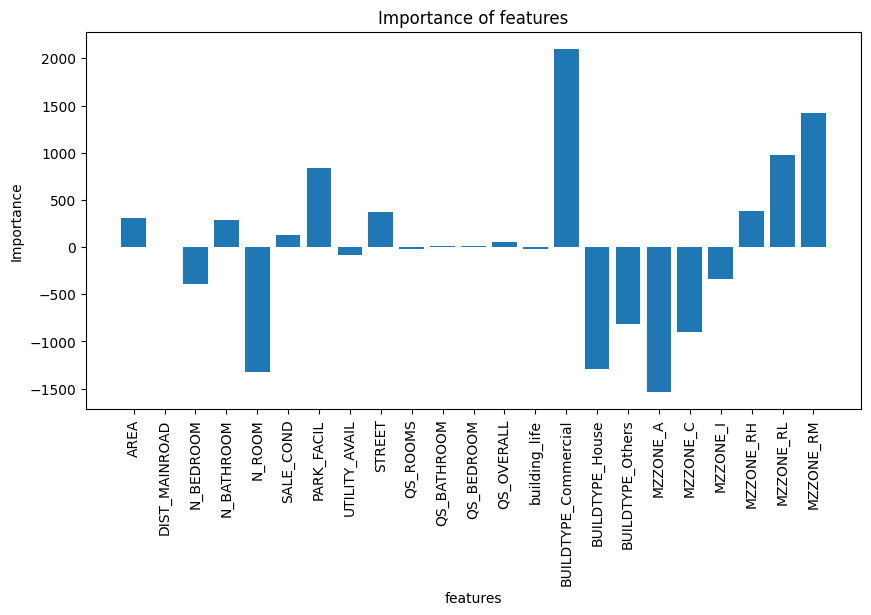

In [75]:
features = df.columns
importance = lr.coef_
pyplot.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
#pyplot.bar([x for x in range(len(importance))], importance)
pyplot.bar(x.columns, importance)
pyplot.xticks(rotation = 90)
pyplot.xlabel('features')
pyplot.ylabel("Importance")
pyplot.title('Importance of features')
pyplot.show()

Feature Scaling using Standard Scalar

In [76]:
#scaling features using standard scalar
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [77]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
import xgboost as xgb
from sklearn.model_selection import cross_val_score

Implementing SGD Regression

In [78]:
sgdr = SGDRegressor()

In [79]:
sgdr.fit(x_train, y_train)
y_pred_sgdr = sgdr.predict(x_test)
r2score = r2_score(y_test, y_pred_sgdr)
print("R2 score for SGD Regression model is", round(r2score,2))

R2 score for SGD Regression model is 0.8


Implementation of Decission Tree

In [80]:
dt = DecisionTreeRegressor(criterion = "mse", max_depth=15)

In [81]:
#Fitting the model and calculating r2 score
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
r2score = r2_score(y_test, y_pred)
print("R2 score for Decission tree model is", r2score)

R2 score for Decission tree model is 0.9050258636921612


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


In [82]:
#creating hyperparameters for tuning 
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 30, 50, 80, 100],
              "max_depth": [2,6,10,5],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

In [83]:
#performing tuning using Gridsearch CV
grid_cv_dt = GridSearchCV(dt, param_grid, cv=5)
grid_cv_dt.fit(x,y)

In [84]:
#identifying best hyper parameters and corresponding score
print(grid_cv_dt.best_params_)
print(grid_cv_dt.best_score_)

In [85]:
#Defining Decission tree model using best hper parameters
tuned_hyper_model= DecisionTreeRegressor(criterion = "mse", max_depth = 10,  max_leaf_nodes = 100,  min_samples_leaf = 20,  min_samples_split = 10)

In [86]:
#fitting the model
tuned_hyper_model.fit(x_train,y_train)
tuned_pred=tuned_hyper_model.predict(x_test)

In [87]:
pyplot.scatter(y_test,tuned_pred)

In [88]:
importance = dt.feature_importances_

In [89]:
sorted_imp = importance.argsort()
pyplot.barh(x_train.columns[sorted_imp], importance[sorted_imp])

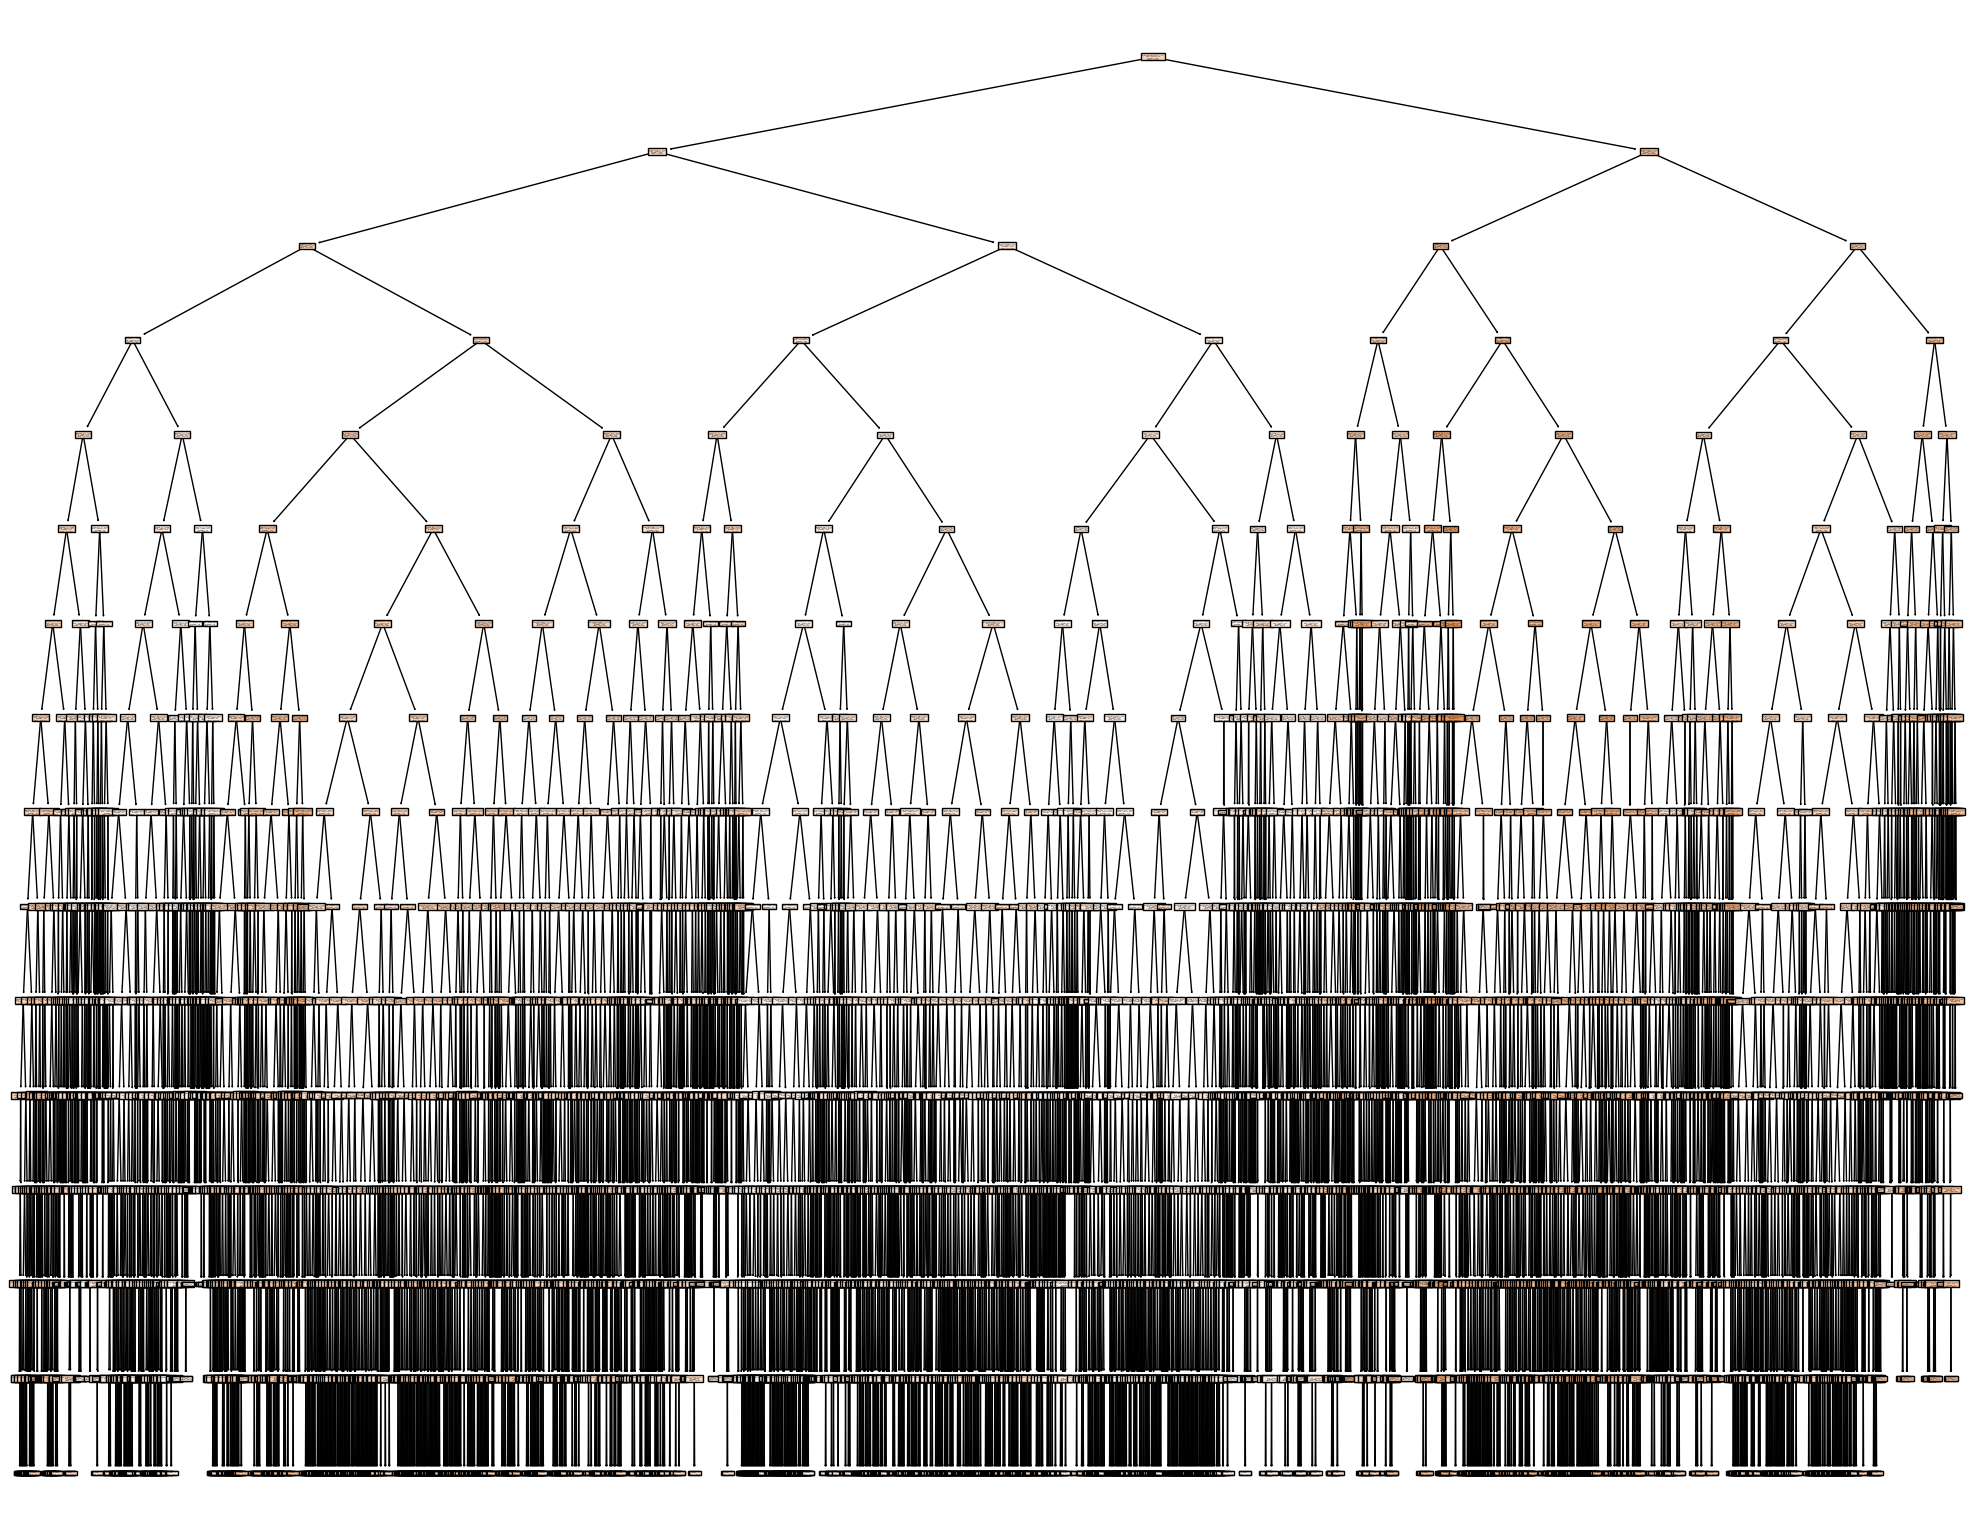

In [90]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
fig = pyplot.figure(figsize=(25,20))
_ = tree.plot_tree(dt, feature_names=x.columns, filled=True)

Implementing RandomForestRegressor Model

In [97]:
#Initialising Random Forest Regression model
rfr = RandomForestRegressor(n_estimators = 1000, max_features = 'sqrt', max_depth = 10)

In [98]:
#fitting the model and calculating score and accuracy
rfr.fit(x_train,y_train)
y_pred_rfr = rfr.predict(x_test)
r2score = r2_score(y_test, y_pred)
print("R2 score for Random Forest model is", round(r2score,3))
errors = abs(y_pred_rfr - y_test)
print('Mean Absolute Error:', round(np.mean(errors),2))
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy of Random Forest Model is:', round(accuracy, 2), '%.')

R2 score for Random Forest model is 0.905
Mean Absolute Error: 523.89
Accuracy of Random Forest Model is: 93.34 %.


In [99]:
from sklearn.model_selection import RandomizedSearchCV

In [100]:
#Hyper parameter Tuning
n_estimators = [100, 500, 1000]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 80, num = 20)]
min_samples_split = [2, 6, 10]
min_samples_leaf = [1, 3, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

In [101]:
#initiating the model with randomized search cv
rfr_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [102]:
rfr_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=10,
                                                   max_features='sqrt',
                                                   n_estimators=1000),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 17, 25, 33, 41, 48,
                                                      56, 64, 72, 80],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [50, 100, 500, 1000]},
                   random_state=35, verbose=2)

In [103]:
print ('Best Parameters: ', rfr_random.best_params_, ' \n')

Best Parameters:  {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 56, 'bootstrap': True}  



In [104]:
randmf = RandomForestRegressor(n_estimators = 500, min_samples_split = 2, min_samples_leaf= 1, max_features = 'auto', max_depth= 56, bootstrap=True) 
randmf.fit( x_train, y_train)

RandomForestRegressor(max_depth=56, n_estimators=500)

In [105]:
y_pred_randmf = randmf.predict(( x_test ) )
r2score = r2_score(y_test, y_pred_randmf)
round(r2score,2)

0.95

In [106]:
feature_list = list(df.columns)

In [107]:
importances = list(randmf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: BUILDTYPE_Commercial Importance: 0.37
Variable: AREA                 Importance: 0.21
Variable: N_BEDROOM            Importance: 0.19
Variable: N_ROOM               Importance: 0.04
Variable: PARK_FACIL           Importance: 0.03
Variable: MZZONE_RM            Importance: 0.03
Variable: STREET               Importance: 0.02
Variable: MZZONE_A             Importance: 0.02
Variable: DIST_MAINROAD        Importance: 0.01
Variable: N_BATHROOM           Importance: 0.01
Variable: SALE_COND            Importance: 0.01
Variable: building_life        Importance: 0.01
Variable: MZZONE_C             Importance: 0.01
Variable: MZZONE_RH            Importance: 0.01
Variable: MZZONE_RL            Importance: 0.01
Variable: UTILITY_AVAIL        Importance: 0.0
Variable: QS_ROOMS             Importance: 0.0
Variable: QS_BATHROOM          Importance: 0.0
Variable: QS_BEDROOM           Importance: 0.0
Variable: QS_OVERALL           Importance: 0.0
Variable: BUILDTYPE_House      Importance: 0.

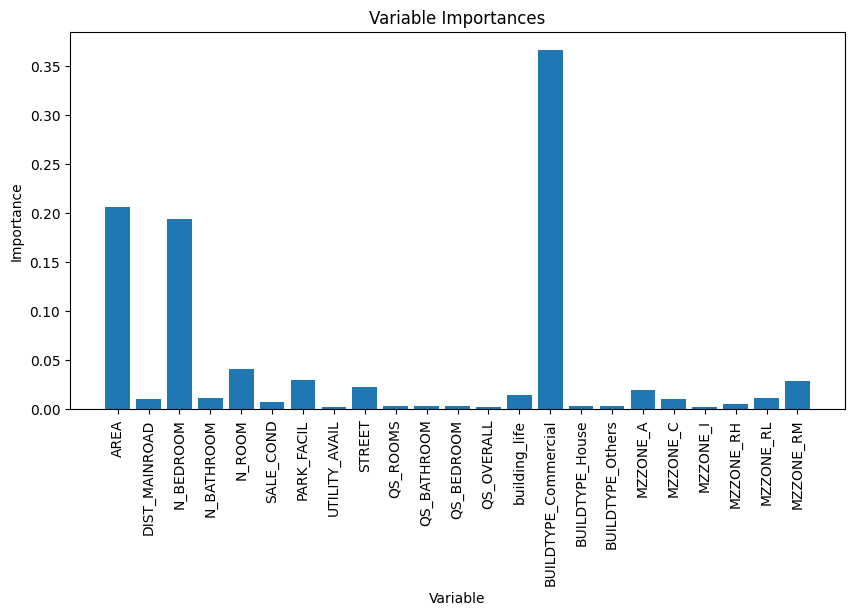

In [108]:
x_values = list(range(len(importances)))
pyplot.bar(x_values, importances, orientation = 'vertical')
pyplot.xticks(x_values, feature_list, rotation='vertical')
pyplot.ylabel('Importance'); pyplot.xlabel('Variable'); pyplot.title('Variable Importances');


Implementing KNN algorithm, Support Vector Machine

In [109]:
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [110]:
rmse_val = []
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train) 
    pred=model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1457.5449741319958
RMSE value for k=  2 is: 1221.1067172049682
RMSE value for k=  3 is: 1146.039166731694
RMSE value for k=  4 is: 1119.2433625826434
RMSE value for k=  5 is: 1105.9001608493081
RMSE value for k=  6 is: 1099.8181659102127
RMSE value for k=  7 is: 1092.9587542209442
RMSE value for k=  8 is: 1101.7790895114374
RMSE value for k=  9 is: 1101.7198093692823
RMSE value for k=  10 is: 1100.1656078028088
RMSE value for k=  11 is: 1098.8561885501322
RMSE value for k=  12 is: 1112.0610092135241
RMSE value for k=  13 is: 1105.6198176087582
RMSE value for k=  14 is: 1109.8863643399507
RMSE value for k=  15 is: 1112.1798806951024
RMSE value for k=  16 is: 1115.574432362075
RMSE value for k=  17 is: 1116.5443393326761
RMSE value for k=  18 is: 1114.345793515095
RMSE value for k=  19 is: 1118.9616768056371
RMSE value for k=  20 is: 1120.9456437135289


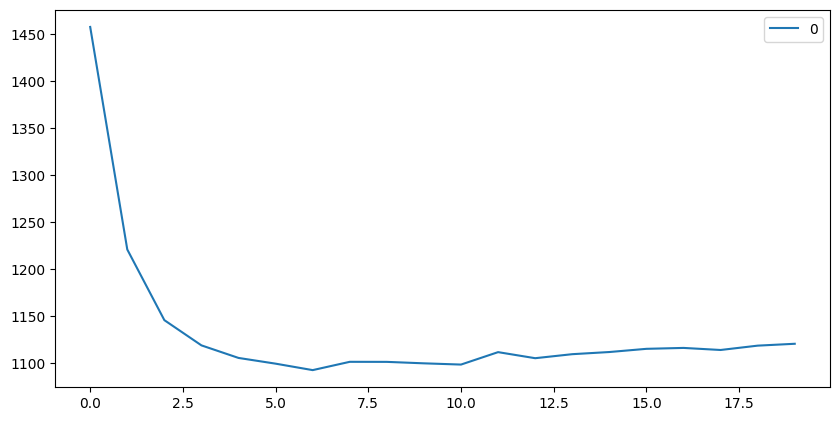

In [111]:
curve = pd.DataFrame(rmse_val)
curve.plot()

In [112]:
#Finding the lowest possible RMSE
model = neighbors.KNeighborsRegressor(n_neighbors = 9)
model.fit(x_train, y_train) 
y_pred=model.predict(x_test)
r2score_knn = round(r2_score(y_test, y_pred), 2)
print(r2score_knn)

0.79


Support Vector Machine

In [113]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(x_train, np.ravel(y_train,order="c")).predict(x_test)
y_lin = svr_lin.fit(x_train, np.ravel(y_train,order="c")).predict(x_test)
y_poly = svr_poly.fit(x_train, np.ravel(y_train,order="c")).predict(x_test)
print(round(r2_score(y_test,y_rbf),2))
print(round(r2_score(y_test,y_lin),2))
print(round(r2_score(y_test,y_poly),2))

0.85
0.79
0.72


Implementing XgBoost Algorithm

In [114]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold

In [115]:
xgbr = xgb.XGBRegressor(learning_rate = 0.5, max_depth = 5, alpha = 10, n_estimators = 100)
xgbr.fit(x_train, y_train)
score = xgbr.score(x_train, y_train)   
print("Training score: ", score) 

[12:41:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training score:  0.9903599899604253


In [116]:
scores = cross_val_score(xgbr, x_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

[12:41:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:42:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:42:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean cross-validation score: 0.96


In [117]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, x_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

[12:42:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:42:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:42:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:42:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:42:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:42:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:42:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:42:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [118]:
y_pred_xgb = xgbr.predict(x_test)
mse = mean_squared_error(y_test, y_pred_xgb)
r2score_xgb = r2_score(y_test, y_pred_xgb)
print("MSE: %.2f" % mse)
print("R2score", (round(r2score_xgb,2)))

MSE: 254378.40
R2score 0.96


In [119]:
print(xgbr.feature_importances_)

[0.06054497 0.00079058 0.17107756 0.06849995 0.01592618 0.00278922
 0.02297786 0.00168084 0.01310905 0.00073196 0.00087797 0.00102259
 0.00109283 0.00204976 0.4742526  0.01458376 0.00146652 0.04735678
 0.02531926 0.00197098 0.0052295  0.02717541 0.03947377]


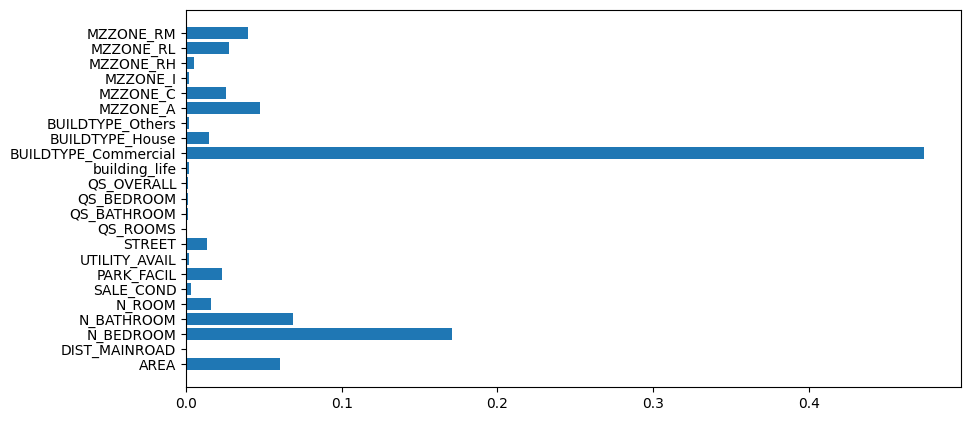

In [123]:
pyplot.barh(x.columns, xgbr.feature_importances_)
pyplot.show()

Text(0.5, 0, 'Xgboost Feature Importance')

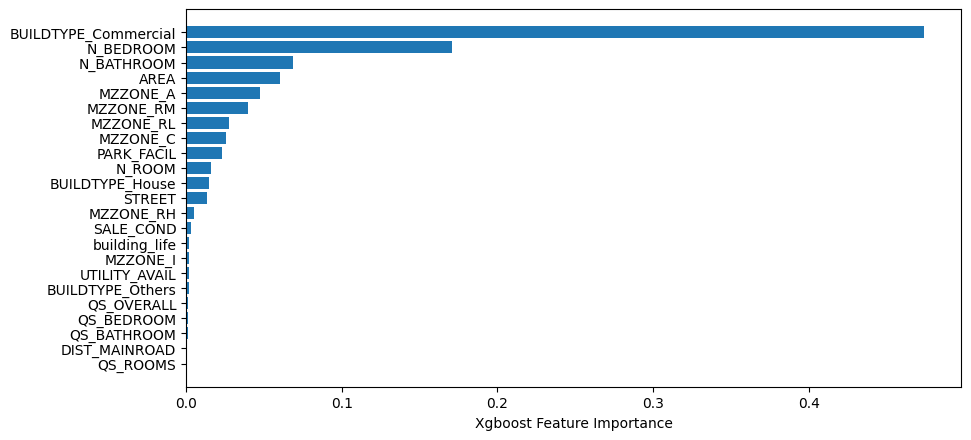

In [121]:
sorted_imp = xgbr.feature_importances_.argsort()
pyplot.barh(features[sorted_imp], xgbr.feature_importances_[sorted_imp])
pyplot.xlabel("Xgboost Feature Importance")

# Final Recommendations

**Analysis**

*   We observed that among all the models, XG boost with 0.96 has highest R2score while Random forest has 0.95 and stands next.
*   Hence weill be going with XG boost
*   We observe that the price of building depends whether it is a commercial building or not. Commercial buildings are selling at higher price per sqft and providing good returns.
*   When it comes to Residential buildings No of rooms like bedrooms and bathrooms are key deciding factor in deciding the rate. 
*   Next important factor in determining the price of building is locality(AREA) in which it is located. As we already observed buildings constructed in Chrompet are selling at high price per sqft and hence would be better to prefer the locality.
*   Municipal Zone the building located is playing next important role in deciding the price of building with buildings in zone's RH, RM, RL selling at higher price.
*   Availability of parking facility is also plkaying key role in deciding the price at which the building is sold with availability of parking increasing the cost of same building and hence better to ensure parking facility to increase the price of building.
* Accessibility to building through type of street like gravel can increase the type of building. Hence ensuring  a road to the building can increase the price of property.   
